In [16]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

In [21]:
os.listdir('/anvar/public_datasets/preproc_study/lgg/4d_susan/TCGA-CS-4942/')

['T1.nii.gz']

In [ ]:
nohup docker run -it --rm --cpuset-cpus='0-15' -v /anvar/public_datasets/preproc_study/lgg/4a_resamp/:/input -v /anvar/public_datasets/preproc_study/lgg/4d_susan/:/output -v ${PWD}:/home --entrypoint /bin/bash cbica/captk:latest &

In [15]:
import tqdm
path = '4a_resamp'

print('/home/kate/projects/qc_preprocessing/{}_lgg/'.format(path))
os.makedirs('/home/kate/projects/qc_preprocessing/{}_lgg/'.format(path), exist_ok = True)

def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/{path}_lgg/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

output = '/anvar/public_datasets/preproc_study/lgg/{}/'.format(path)

for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/FLAIR.nii.gz')
        mask = ants.image_read(output + patient +'/CT1_SEG.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

  0%|          | 0/39 [00:00<?, ?it/s]

/home/kate/projects/qc_preprocessing/4a_resamp_lgg/


 95%|█████████▍| 37/39 [01:45<00:05,  2.79s/it]

File /anvar/public_datasets/preproc_study/lgg/4a_resamp/logging.txt/FLAIR.nii.gz does not exist! logging.txt


100%|██████████| 39/39 [01:48<00:00,  2.78s/it]


In [18]:
scp -r notebook_airi:/home/kate/projects/qc_preprocessing/2a_interp_lgg/ /mnt/d/

SyntaxError: invalid syntax (3631221682.py, line 1)

In [24]:
def plot_qc_show(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.show()

In [37]:
list_subjs = os.listdir('/anvar/public_datasets/preproc_study/lgg/orig/')

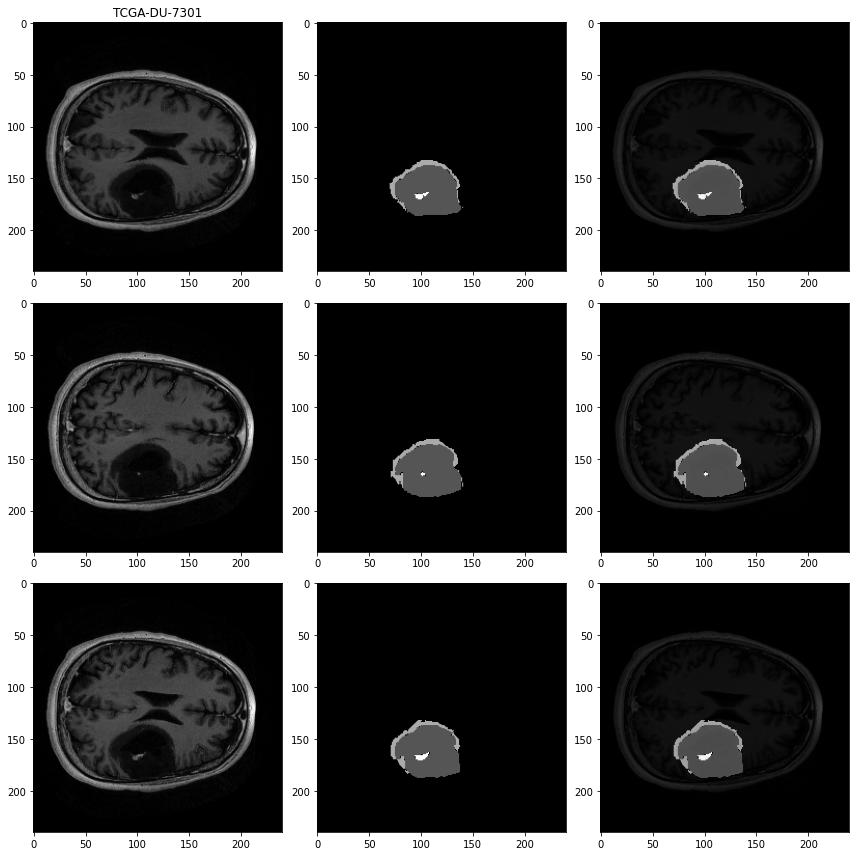

In [40]:
path = '6_hist/6_hist_fold_0/'
output = '/anvar/public_datasets/preproc_study/lgg/{}/'.format(path)

patient = list_subjs[9]
im = ants.image_read(output + patient +'/CT1.nii.gz')
mask = ants.image_read(output + patient +'/CT1_SEG.nii.gz')
plot_qc_show(im, mask, patient_id=str(patient))

In [ ]:
#